<a href="https://colab.research.google.com/github/mikedcurry/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Curry_LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [0]:
!pip install --upgrade seaborn

In [0]:
import seaborn as sns
sns.__version__

'0.9.0'

In [0]:
!pip freeze

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [0]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [0]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [0]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [0]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [0]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [0]:
concepts.head(3)

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
# help(pd.merge)

# DEFAULT MERGE PAREMTERS

# merge(left, right, how='inner', on=None, left_on=None, right_on=None, 
# left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), 
# copy=True, indicator=False, validate=None)
# Merge DataFrame or named Series objects with a database-style join.

In [0]:

# Previous method...
# df = pd.merge(income, lifespan)
# df = pd.merge(df, population)


# TOday's method
df = income.merge(lifespan).merge(population)

In [0]:
df.shape

# Amputation...

(40437, 5)

In [0]:
df.head(2)

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000


In [0]:
#holy cow! I need to know this one!!!!

entities.columns

Index(['country', 'alt_5', 'alternative_1', 'alternative_2', 'alternative_3',
       'alternative_4_cdiac', 'arb1', 'arb2', 'arb3', 'arb4', 'arb5', 'arb6',
       'g77_and_oecd_countries', 'gapminder_list', 'god_id', 'gwid',
       'income_groups', 'is--country', 'iso3166_1_alpha2', 'iso3166_1_alpha3',
       'iso3166_1_numeric', 'iso3166_2', 'landlocked', 'latitude', 'longitude',
       'main_religion_2008', 'name', 'pandg', 'un_state',
       'unicode_region_subtag', 'upper_case_name', 'world_4region',
       'world_6region'],
      dtype='object')

In [0]:
# Just want a few of the columns from entities:

# entities[['country', 'name', 'world_6region']] --> this is the trick!

entities_chopped = entities[['country', 'name', 'world_6region']]

df = pd.merge(df, entities_chopped, left_on='geo', right_on='country')


In [0]:
df.head(2)

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia


In [0]:
df = df.drop(columns = ['geo', 'country'], axis='columns')

In [0]:
df.head(2)

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,world_6region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia


In [0]:
df = df.rename(columns={
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years': 'lifespan',
    'world_6region': 'region',
    'name': 'country',
    'population_total': 'population',
    'time': 'year'
    
})   

df.tail(2)

,year,income,lifespan,population,country,region
40435,2017,1907,59.80,16529904,Zimbabwe,sub_saharan_africa
40436,2018,1952,60.18,16913261,Zimbabwe,sub_saharan_africa


In [0]:
#taking out the underscores in region...

df['region'] = df['region'].replace('_', ' ', regex=True).str.title()


#Neat Trick: .str.title()   capitalizes each for in a string like a title

df.head(3)

,year,income,lifespan,population,country,region
0,1800,603,28.21,3280000,Afghanistan,South Asia
1,1801,603,28.20,3280000,Afghanistan,South Asia
2,1802,603,28.19,3280000,Afghanistan,South Asia


## Explore data

In [0]:
df.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [0]:
df.income.skew()

6.3005824038561125

In [0]:
df[df['year'] == 2018].skew()

year          0.000000
income        2.056521
lifespan     -0.506461
population    8.224550
dtype: float64

In [0]:
df[df['year'] == 1801].skew()

year           0.000000
income         2.651380
lifespan       0.008131
population    10.223009
dtype: float64

In [0]:
df.describe(exclude='number')

,country,region
count,40437,40437
unique,187,6
top,Togo,Europe Central Asia
freq,219,10778


## Plot visualization

In [0]:
usa = df[df['country'] == 'United States']
usa.head()

,year,income,lifespan,population,country,region
38028,1800,2127,39.41,6801854,United States,America
38029,1801,2167,39.41,6933517,United States,America
38030,1802,2202,39.41,7067728,United States,America
38031,1803,2166,39.41,7204538,United States,America
38032,1804,2165,39.41,7343995,United States,America


In [0]:
usa[usa['year'].isin([1818,1918,2018])]

,year,income,lifespan,population,country,region
38046,1818,2258,39.41,9879049,United States,America
38146,1918,9371,47.18,106721812,United States,America
38246,2018,54898,79.14,326766748,United States,America


In [0]:
present = df[df['year']==2018]
present.head()

,year,income,lifespan,population,country,region
218,2018,1867,58.69,36373176,Afghanistan,South Asia
437,2018,5846,65.19,30774205,Angola,Sub Saharan Africa
656,2018,12424,78.01,2934363,Albania,Europe Central Asia
922,2018,68231,76.89,9541615,United Arab Emirates,Middle East North Africa
1141,2018,18942,76.97,44688864,Argentina,America


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4836e21d30>,
      dtype=object)

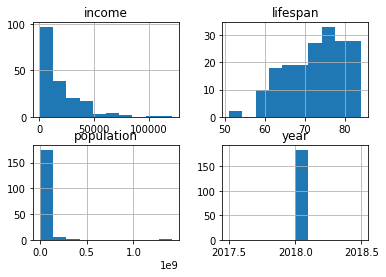

In [0]:
present.hist()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2018.0, right=2018.0
  ax.set_xlim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2018.0, right=2018.0
  ax.set_xlim(boundaries_list[j])


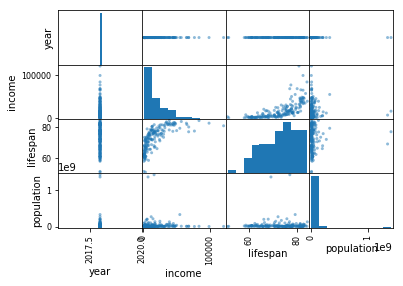

In [0]:
pd.plotting.scatter_matrix(present);

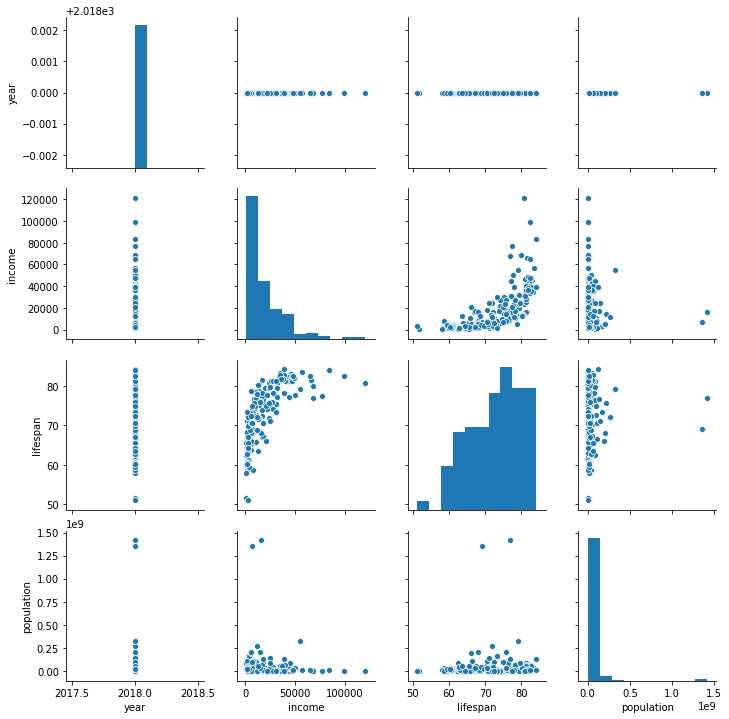

In [0]:
import seaborn as sns

sns.pairplot(present)

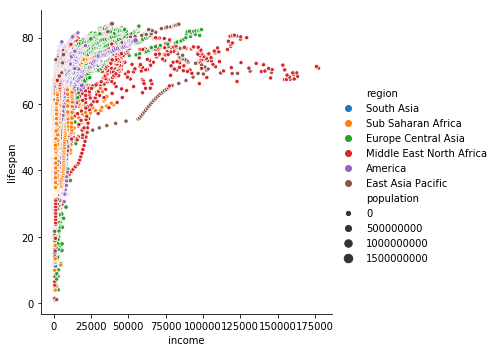

In [0]:
# ALL of THEM

sns.relplot(x='income', y='lifespan', hue='region', size='population', data=df);

## Analyze outliers

In [0]:
help(sns.relplot)

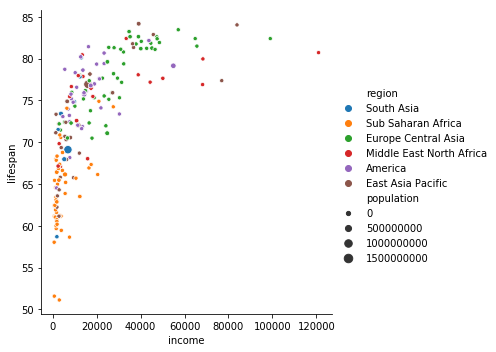

In [0]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=present);

In [0]:
present['log_income'] = np.log(present['income'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
present.head()

,year,income,lifespan,population,country,region,log_income
218,2018,1867,58.69,36373176,Afghanistan,South Asia,7.532088
437,2018,5846,65.19,30774205,Angola,Sub Saharan Africa,8.673513
656,2018,12424,78.01,2934363,Albania,Europe Central Asia,9.427385
922,2018,68231,76.89,9541615,United Arab Emirates,Middle East North Africa,11.130654
1141,2018,18942,76.97,44688864,Argentina,America,9.849137


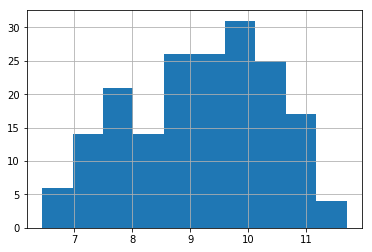

In [0]:
# log normalized income distribution...

present.log_income.hist();

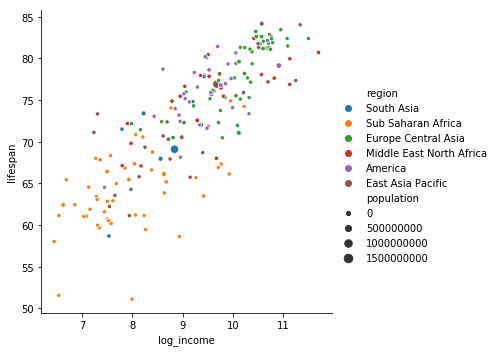

In [0]:
sns.relplot(x='log_income', y='lifespan', hue='region', size='population', data=present);

In [0]:
present[present['log_income'] >= 11].sort_values(by='log_income', ascending=False)

,year,income,lifespan,population,country,region,log_income
30362,2018,121033,80.71,2694849,Qatar,Middle East North Africa,11.703819
22212,2018,99034,82.39,590321,Luxembourg,Europe Central Asia,11.503219
31895,2018,83888,84.03,5791901,Singapore,East Asia Pacific,11.337238
5521,2018,76943,77.36,434076,Brunei,East Asia Pacific,11.250820
20241,2018,68359,79.96,4197128,Kuwait,Middle East North Africa,11.132529
922,2018,68231,76.89,9541615,United Arab Emirates,Middle East North Africa,11.130654
16956,2018,65622,81.49,4803748,Ireland,Europe Central Asia,11.091666
27296,2018,64846,82.39,5353363,Norway,Europe Central Asia,11.079771


In [0]:
qatar = present[present['country'] == 'Qatar']
qatar_income = qatar['log_income'].values


qatar_lifespan = qatar['lifespan'].values

print(qatar_income, qatar_lifespan)

[11.70381851] [80.71]


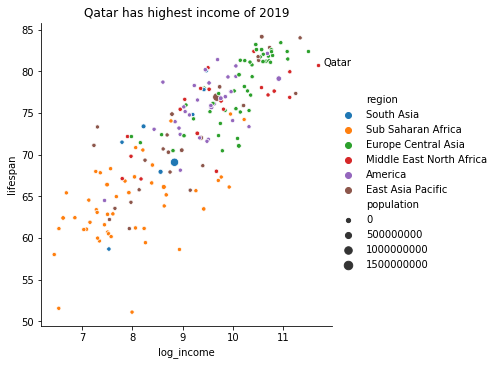

In [0]:
sns.relplot(x='log_income', y='lifespan', hue='region', size='population', data=present);
plt.text(x=qatar_income +.1, y = qatar_lifespan , s='Qatar')
plt.title('Qatar has highest income of 2019');

In [0]:
df['log_income'] = np.log(df['income'])

In [0]:
df.head(2)

,year,income,lifespan,population,country,region,log_income
0,1800,603,28.21,3280000,Afghanistan,South Asia,6.401917
1,1801,603,28.20,3280000,Afghanistan,South Asia,6.401917


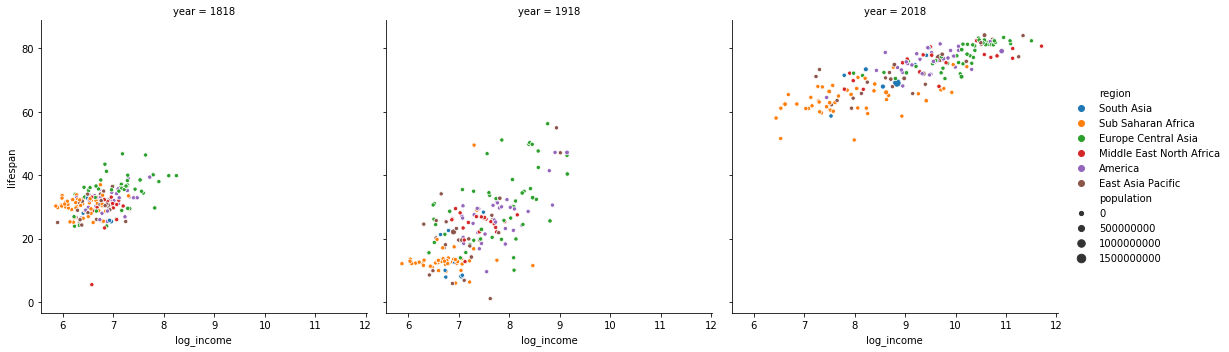

In [0]:

years = ['1818','1918','2018']

centuries = df[df['year'].isin(years)]

sns.relplot(x='log_income', y='lifespan', hue='region', size='population',
           col='year', data=centuries);


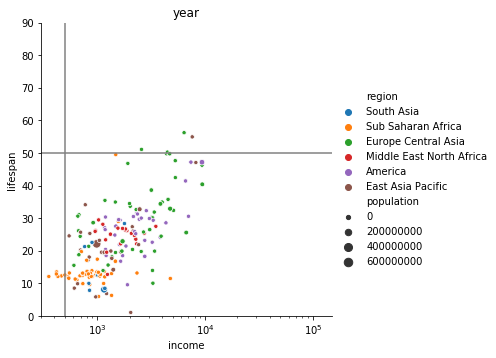

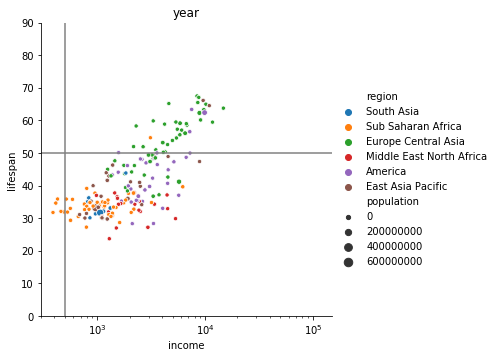

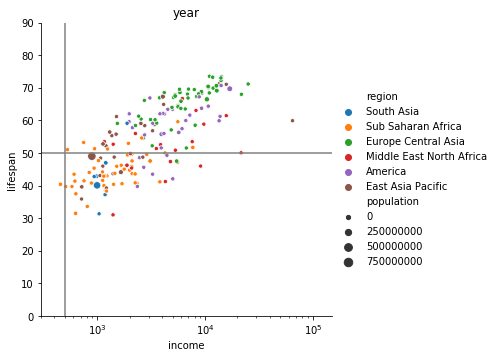

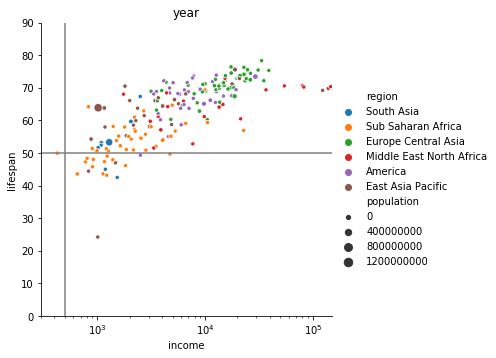

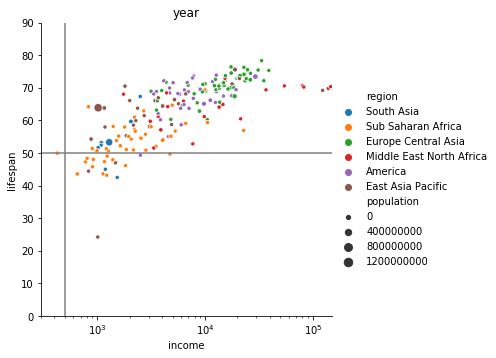

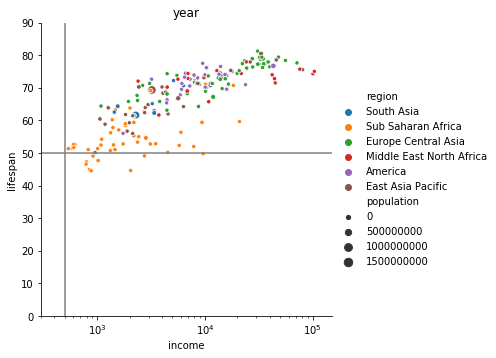

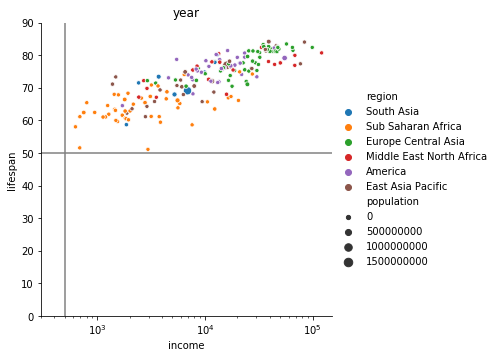

In [0]:
years = [1918, 1938, 1958, 1978, 1978, 1998, 2018]


#another way to do it...

for year in years:
  sns.relplot(x='income', y='lifespan', hue='region', size='population',
           col='year', data=df[df['year'] == year])                             # really don't like this way...
  
  plt.xscale('log')
  plt.title('year')
  plt.xlim(300, 150000)
  plt.ylim(0,90)
  plt.axhline(y=50, color='gray')
  plt.axvline(x=500, color='gray')

# centuries = df[df['year'].isin(years)]

# sns.relplot(x='log_income', y='lifespan', hue='region', size='population',
#            col='year', data=centuries);
# plt.title('year')
# plt.xlim(5.5, 11.5)

In [0]:
# I know I'm going to need this for the sprint challenge tomorrow...


#COMBINED PAREMETER/FILTERING DFS

df[(df.year == 1918) & (df.lifespan >= 50)]


,year,income,lifespan,population,country,region,log_income
1698,1918,7610,54.95,5066003,Australia,East Asia Pacific,8.937218
10067,1918,6393,56.24,3165276,Denmark,Europe Central Asia,8.762959
17513,1918,2576,51.11,115504,Iceland,Europe Central Asia,7.853993
27196,1918,4479,50.28,2576646,Norway,Europe Central Asia,8.407155


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

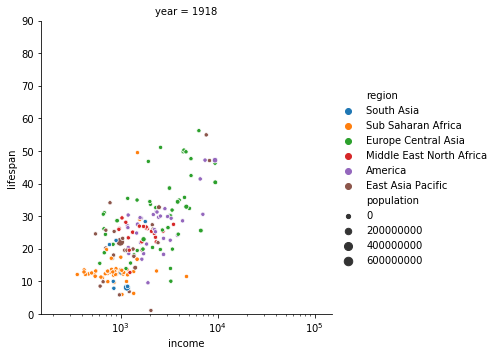

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

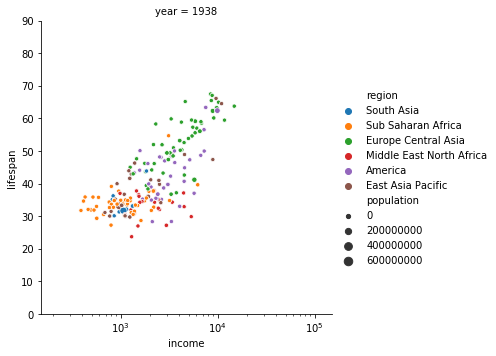

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

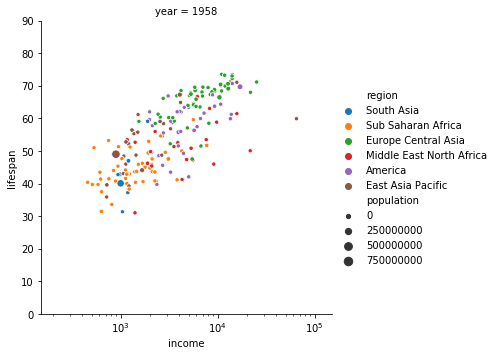

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

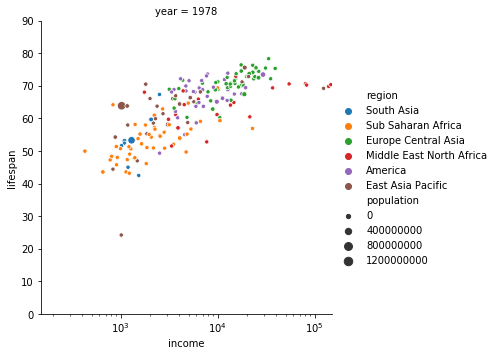

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

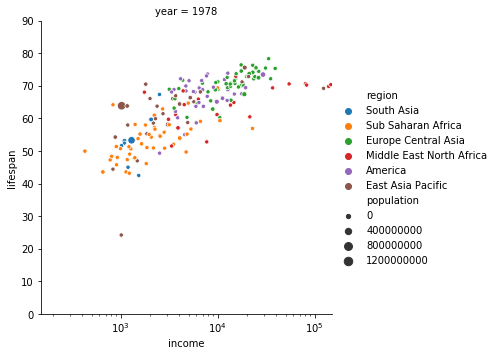

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

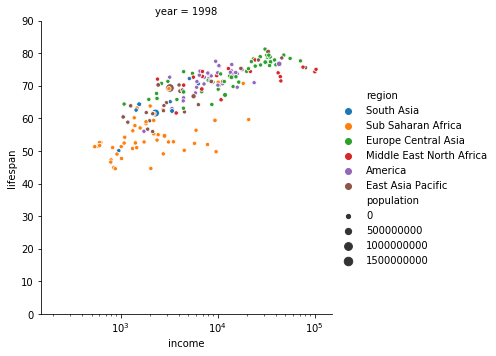

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

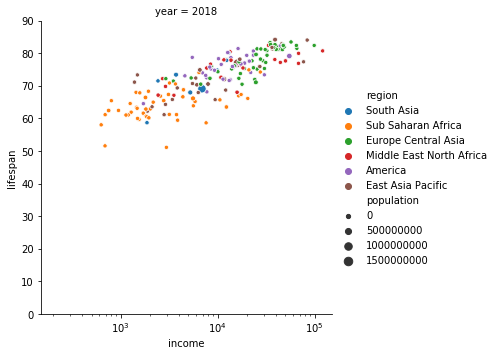

<IPython.core.display.Javascript object>

In [0]:
from google.colab import widgets

years = [1918, 1938, 1958, 1978, 1978, 1998, 2018]

tb = widgets.TabBar([str(year) for year in years])
for tab, year in zip(tb, years):
  sns.relplot(x='income', y='lifespan', hue='region', size='population',
           col='year', data=df[df['year'] == year])  
  plt.xscale('log')
  plt.xlim((150, 150000))
  plt.ylim((0, 90));

## Plot multiple years

In [0]:
#messed up the order, but it's all up above

## Point out a story

In [0]:
#messed up the order, but it's all up above

# ASSIGNMENT

- Replicate the lesson code

- Improve the Gapminder graph...
- change size of dots...
- add title and subtitle
- adjust color options


# STRETCH OPTIONS

- add small tick marks to graph

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project

In [0]:
# Something broken

# !pip install -I "phoebe>=2.1,<2.2"

In [0]:
# import phoebe
# from phoebe import u # units
# import numpy as np
# import matplotlib.pyplot as plt

# logger = phoebe.logger()

# b = phoebe.default_binary()

In [0]:
import matplotlib.animation as animation
import matplotlib

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 999, in _start
    self._init_draw()
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1740, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1762, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-140-1687d846f729>", line 14, in animate
    col=df['year'], data=data)
  File "/usr/local/lib/python3.6/dist-packages/seaborn/relational.py", line 1576, in relplot
    legend=legend,
  File "/usr/local/lib/python3.6/dist-packages/seaborn/relational.py", line 852, in __init__
    x, y, hue, size, style, units, data
  File "/usr/local/lib/python3.6/dist-packages/seaborn/relational.py", line 157

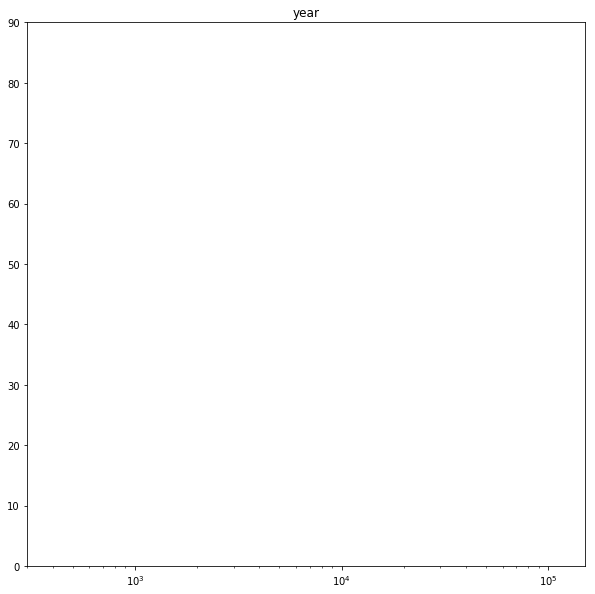

In [0]:
# ~~~~~~~~~~~~MAS FAIL~~~~~~~~~~~~~~~

# Creating the fig of the graph on which to animate something...

fig = plt.figure(figsize=(10,10))

plt.xscale('log')
plt.title('year')
plt.xlim(300, 150000)
plt.ylim(0,90);

# Uhh.... is this going to work? probably not...

def animate(i):
  data = df['year'].iloc[:(i+1)]   #something is wrong with this line, but I don't know what...
  p = sns.relplot(x=df['income'], y=df['lifespan'], hue=df['region'], size=df['population'],
           col=df['year'], data=data)
  p.tick_params(labelsize=17)
  plt.setp(p.lines,linewidth=7)
  
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)

plt.show()

In [0]:
def animate(i):
  data = df.iloc[:(i+1)]
  p = sns.relplot(x='income', y='lifespan', hue='region', size='population',
           col='year', data=data)
  
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)